In [295]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [296]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [297]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [298]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [299]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [300]:
##general analyze
def fill(df):
    df['Age'].fillna(-1,inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    return df
def fare(df):
    bins=[8,32]
    labels=['low','medium','very-high']
    minval=df['Fare'].min()
    maxval=df['Fare'].max()
    break_points=[minval]+bins+[maxval]
    df['Fare_bin']=pd.cut(df['Fare'],bins=break_points,labels=labels,include_lowest=True)
    return df
def name(df):
    df['Lname']=df.Name.apply(lambda x:x.split(',')[0])
    df['NamePrefix']=df.Name.apply(lambda x:x.split()[1])
    return df
##modifying age
def age(df):
    bins=[0,24,45]
    labels=['Unknown','child','adult','old']
    minval=df['Age'].min()
    maxval=df['Age'].max()
    break_points=[minval]+bins+[maxval]
    df['Age_bin']=pd.cut(df['Age'],bins=break_points,labels=labels,include_lowest=True)
    return df
def cabin(df):
    df['Cabin']=df.Cabin.apply(lambda x:x[0])
    return df
##modifying type
def modify_type(df):
    df['Parch']=df['Parch'].astype(str)
    df['Pclass']=df['Pclass'].astype(str)
    df['SibSp']=df['SibSp'].astype(str)
    return df
def drop(df):
    df=df.drop(['Name','Ticket','PassengerId','Fare','Age','Fare_bin','Cabin'],axis=1)
    return df

def apply_transform(df):
    df=fill(df)
    df=fare(df)
    df=name(df)
    df=age(df)
    df=cabin(df)
    df=modify_type(df)
    df=drop(df)
    return df




In [301]:
df_train=apply_transform(df_train)
test_Ids=list(df_test['PassengerId'])
df_test=apply_transform(df_test)

In [302]:
df_test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Lname,NamePrefix,Age_bin
0,3,male,0,0,Q,Kelly,Mr.,adult
1,3,female,1,0,S,Wilkes,Mrs.,old
2,2,male,0,0,Q,Myles,Mr.,old
3,3,male,0,0,S,Wirz,Mr.,adult
4,3,female,1,1,S,Hirvonen,Mrs.,child


In [303]:
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Lname,NamePrefix,Age_bin
0,0,3,male,1,0,S,Braund,Mr.,child
1,1,1,female,1,0,C,Cumings,Mrs.,adult
2,1,3,female,0,0,S,Heikkinen,Miss.,adult
3,1,1,female,1,0,S,Futrelle,Mrs.,adult
4,0,3,male,0,0,S,Allen,Mr.,adult


In [304]:
y=np.array(df_train['Survived'])
data_dict=df_train.drop(['Survived'],axis=1).T.to_dict().values()
data_dict

[{'Age_bin': 'child',
  'Embarked': 'S',
  'Lname': 'Braund',
  'NamePrefix': 'Mr.',
  'Parch': '0',
  'Pclass': '3',
  'Sex': 'male',
  'SibSp': '1'},
 {'Age_bin': 'adult',
  'Embarked': 'C',
  'Lname': 'Cumings',
  'NamePrefix': 'Mrs.',
  'Parch': '0',
  'Pclass': '1',
  'Sex': 'female',
  'SibSp': '1'},
 {'Age_bin': 'adult',
  'Embarked': 'S',
  'Lname': 'Heikkinen',
  'NamePrefix': 'Miss.',
  'Parch': '0',
  'Pclass': '3',
  'Sex': 'female',
  'SibSp': '0'},
 {'Age_bin': 'adult',
  'Embarked': 'S',
  'Lname': 'Futrelle',
  'NamePrefix': 'Mrs.',
  'Parch': '0',
  'Pclass': '1',
  'Sex': 'female',
  'SibSp': '1'},
 {'Age_bin': 'adult',
  'Embarked': 'S',
  'Lname': 'Allen',
  'NamePrefix': 'Mr.',
  'Parch': '0',
  'Pclass': '3',
  'Sex': 'male',
  'SibSp': '0'},
 {'Age_bin': 'Unknown',
  'Embarked': 'Q',
  'Lname': 'Moran',
  'NamePrefix': 'Mr.',
  'Parch': '0',
  'Pclass': '3',
  'Sex': 'male',
  'SibSp': '0'},
 {'Age_bin': 'old',
  'Embarked': 'S',
  'Lname': 'McCarthy',
  'NamePre

In [305]:
##building model
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer()
X=vec.fit_transform(data_dict).toarray()

In [306]:
##splitting the data
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)
X_train_pca=X_train
X_test_pca=X_test
X_pca=X


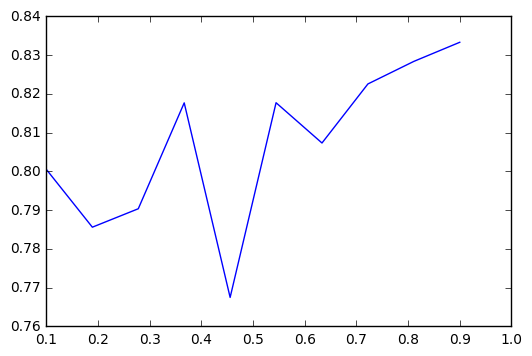

In [307]:
size=np.linspace(0.1,0.9,10)
acc_p=[]
for s in size:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1-s)
    clf1.fit(X_train,y_train)
    t1=time()
    pred=clf1.predict(X_test)
    acc_p.append([s,clf1.score(X_test,y_test)])
acc_p=np.array(acc_p)
plt.plot(acc_p[:,0],acc_p[:,1])
plt.show()

In [308]:
##performing Pca
from sklearn.decomposition import PCA
pca=PCA(n_components=10).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
X_pca=pca.transform(X)
print pca.explained_variance_ratio_[0]
print X_pca[0]


0.182926843348
[  4.32676750e-01  -1.08218488e-01  -1.02843224e+00   5.45268183e-01
   2.84629519e-01  -1.36676009e-01   1.67008243e-01   9.94899525e-01
   2.86809715e-02  -4.31039903e-04]


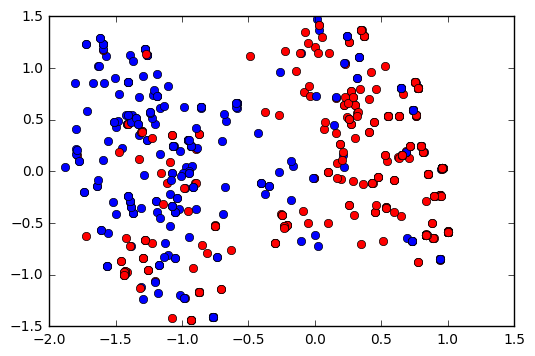

In [309]:
##plotting the data
color=['ro','bo','go']
from matplotlib import pyplot as plt
for i in range(len(X_pca)):
    plt.plot(X_pca[i,0],X_pca[i,1],color[y[i]])
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from time import time
params=[
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.01,0.1,0.001, 0.0001], 'kernel': ['rbf']},
 ]

parameters = {'n_estimators': [15,20,30,100,120], 
              'max_features': ['log2', 'auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2,  5,10,15,20],
             }
#clf=RandomForestClassifier(n_estimators=150,min_samples_split=5)
#clf=GridSearchCV(RandomForestClassifier(),parameters)
#clf=GridSearchCV(SVC(),params)
#clf=GaussianNB()
#clf=AdaBoostClassifier()
clf=DecisionTreeClassifier(min_samples_split=12)
#clf=SVC(kernel='rbf',gamma=0.001,C=100)
t0=time()
clf.fit(X_train,y_train)
print "Training time is",round(time()-t0,3)
t1=time()
pred=clf.predict(X_test)
print "Predicting time",round(time()-t1,3)
print clf.score(X_test,y_test)

In [283]:
clf1=clf.best_estimator_
print clf1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [22]:
import pickle
pickle.dump(clf1,open('best_titanic.pkl','w'))

In [284]:
from sklearn.cross_validation import KFold
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np
y=np.array(y,dtype=int)
def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    print kf
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf1)

sklearn.cross_validation.KFold(n=891, n_folds=10, shuffle=False, random_state=None)
Fold 1 accuracy: 0.8
Fold 2 accuracy: 0.775280898876
Fold 3 accuracy: 0.775280898876
Fold 4 accuracy: 0.842696629213
Fold 5 accuracy: 0.808988764045
Fold 6 accuracy: 0.797752808989
Fold 7 accuracy: 0.786516853933
Fold 8 accuracy: 0.76404494382
Fold 9 accuracy: 0.85393258427
Fold 10 accuracy: 0.808988764045
Mean Accuracy: 0.801348314607


In [285]:
data_dict_test=df_test.T.to_dict().values()

In [286]:
print data_dict_test[0]
data_dict[0]

{'Age_bin': 'adult', 'Embarked': 'Q', 'Parch': '0', 'Pclass': '3', 'Sex': 'male', 'Lname': 'Kelly', 'NamePrefix': 'Mr.', 'SibSp': '0', 'Cabin': 'N'}


{'Age_bin': 'child',
 'Cabin': 'N',
 'Embarked': 'S',
 'Lname': 'Braund',
 'NamePrefix': 'Mr.',
 'Parch': '0',
 'Pclass': '3',
 'Sex': 'male',
 'SibSp': '1'}

In [287]:

X_test_data=vec.transform(data_dict_test).toarray()

In [288]:
clf1.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [289]:
y_test_data=clf1.predict(X_test_data)

In [290]:
b=zip(test_Ids,y_test_data)

In [291]:
df_write=pd.DataFrame(b,columns=['PassengerId','Survived'])
df_write=pd.pivot_table(df_write,index=['PassengerId'])

In [292]:
df_write.to_csv('result.csv')

In [293]:
clf1.score(X,y)

0.85072951739618408

In [294]:
df=pd.read_csv('result1.csv')
df2=pd.read_csv('result.csv')
sum(df['Survived'] !=df2['Survived'])

13